<a href="https://colab.research.google.com/github/ThierrryScotto/trabalho_pratico/blob/main/EDA_IMNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [25]:
!pip install metpy --quiet

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from metpy.calc import heat_index
from metpy.units import units

# Dataset

In [69]:
url = "https://raw.githubusercontent.com/ThierrryScotto/trabalho_pratico/refs/heads/main/INMET.csv"

In [70]:
dataset = pd.read_csv(url, sep=";")
dataset

<ipython-input-70-ad7fa1b16750>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(url, sep=";")


,DATA,HORA,PRECIPITACAO_TOTAL_HORARIO_MM,PRESSAO_ATMOSFERICA_NIVEL_ESTACAO_HORARIA_MB,PRESSAO_ATMOSFERICA_MAX.NA_HORA_ANT_AUT_MB,PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_MB,RADIACAO_GLOBAL_KJ_m2,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,TEMPERATURA_PONTO_DE_ORVALHO_C,TEMPERATURA_MAXIMA_NA_HORA_ANT_AUT_C,TEMPERATURA_MINIMA_NA_HORA_ANT_AUT_C,TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT_C,TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT_C,UMIDADE_REL_MAX_NA_HORA_ANT_AUT_%,UMIDADE_REL_MIN_NA_HORA_ANT_AUT_%,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_DIRECAO_HORARIA_GR,VENTO_RAJADA_MAXIMA_M/S,VENTO_VELOCIDADE_HORARIA_M/S,Unnamed: 19
0,2000-09-22,22:00,0,"1014,1","1014,3",1014,13,"15,7","9,8","17,7","15,6","10,9","9,8",70.0,62.0,68.0,106.0,"6,3","2,4",NaN
1,2000-09-22,21:00,0,"1014,3","1014,3",1014,448,"17,8","10,7","19,8","17,8","10,7","9,4",63.0,51.0,63.0,112.0,"4,7","2,2",NaN
2,2000-09-22,20:00,0,1014,1014,"1013,9",1252,"19,8","9,8","21,2","19,7","10,3","6,5",54.0,40.0,52.0,141.0,"4,3","1,7",NaN
3,2000-09-22,19:00,0,1014,"1014,2","1013,9",1924,"20,9","7,4","21,2","20,3","8,3","6,4",45.0,39.0,42.0,295.0,"3,9","1,7",NaN
4,2000-09-22,18:00,0,"1014,1","1014,8","1014,1",2791,"20,9","6,9","21,3","20,2","9,6","6,2",48.0,40.0,40.0,246.0,"5,2","1,1",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211339,2024-10-31,0200 UTC,0,"1009,8",1010,"1009,8",NaN,"20,8","17,9","21,2","20,8","18,2","17,9",84.0,83.0,84.0,117.0,"7,7",2,NaN
211340,2024-10-31,0100 UTC,0,"1009,9",1010,"1009,8",NaN,"21,1","18,2","21,4","21,1","18,4","18,2",84.0,83.0,83.0,114.0,"11,1","2,4",NaN
211341,2024-10-31,2300 UTC,0,"1006,1","1006,2","1005,5",NaN,"22,6","17,5","23,4","22,6","17,9","17,5",74.0,72.0,73.0,125.0,6,2,NaN
211342,2024-10-31,1000 UTC,0,"1009,7","1009,7","1009,1","464,1","21,8","17,7","21,8","19,7",18,"17,3",87.0,78.0,78.0,130.0,"5,3","1,3",NaN


# EDA

In [71]:
features = ['DATA',
            'TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C',
            'RADIACAO_GLOBAL_KJ_m2',
            'UMIDADE_RELATIVA_DO_AR_HORARIA_%',
            'VENTO_VELOCIDADE_HORARIA_M/S']

dataset = dataset[features]

In [72]:
dataset[features]

,DATA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,RADIACAO_GLOBAL_KJ_m2,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
0,2000-09-22,"15,7",13,68.0,"2,4"
1,2000-09-22,"17,8",448,63.0,"2,2"
2,2000-09-22,"19,8",1252,52.0,"1,7"
3,2000-09-22,"20,9",1924,42.0,"1,7"
4,2000-09-22,"20,9",2791,40.0,"1,1"
...,...,...,...,...,...
211339,2024-10-31,"20,8",NaN,84.0,2
211340,2024-10-31,"21,1",NaN,83.0,"2,4"
211341,2024-10-31,"22,6",NaN,73.0,2
211342,2024-10-31,"21,8","464,1",78.0,"1,3"


In [73]:
dataset.describe()

,UMIDADE_RELATIVA_DO_AR_HORARIA_%
count,211096.000000
mean,-232.412471
std,1735.624458
min,-9999.000000
25%,63.000000
50%,79.000000
75%,89.000000
max,100.000000


In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211344 entries, 0 to 211343
Data columns (total 5 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   DATA                                    211344 non-null  object 
 1   TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C  204641 non-null  float64
 2   RADIACAO_GLOBAL_KJ_m2                   94528 non-null   float64
 3   UMIDADE_RELATIVA_DO_AR_HORARIA_%        204634 non-null  float64
 4   VENTO_VELOCIDADE_HORARIA_M/S            203614 non-null  float64
dtypes: float64(4), object(1)
memory usage: 8.1+ MB


In [75]:
dataset.isna().sum()

,0
DATA,0
TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,243
RADIACAO_GLOBAL_KJ_m2,23914
UMIDADE_RELATIVA_DO_AR_HORARIA_%,248
VENTO_VELOCIDADE_HORARIA_M/S,294


- Pontos vazios
- dados valores inválidos -9999
- Dados númericos como str

In [76]:
dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'] = dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].str.replace(',', '.').astype(float)
dataset['RADIACAO_GLOBAL_KJ_m2']                  = dataset['RADIACAO_GLOBAL_KJ_m2'].str.replace(',', '.').astype(float)
dataset['VENTO_VELOCIDADE_HORARIA_M/S']           = dataset['VENTO_VELOCIDADE_HORARIA_M/S'].str.replace(',', '.').astype(float)

<ipython-input-76-d8c30489b29d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'] = dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].str.replace(',', '.').astype(float)
<ipython-input-76-d8c30489b29d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['RADIACAO_GLOBAL_KJ_m2']                  = dataset['RADIACAO_GLOBAL_KJ_m2'].str.replace(',', '.').astype(float)
<ipython-input-76-d8c30489b29d>:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [77]:
dataset = dataset.replace(-9999.0, np.nan)

In [80]:
dataset.describe()

,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,RADIACAO_GLOBAL_KJ_m2,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
count,204641.000000,94528.000000,204634.000000,203614.000000
mean,19.965591,1210.119407,76.000054,1.537382
std,5.704715,1073.503815,15.736912,1.016877
min,0.400000,0.000000,15.000000,0.000000
25%,16.100000,225.000000,65.000000,0.800000
50%,20.100000,961.000000,79.000000,1.400000
75%,23.700000,2026.025000,89.000000,2.100000
max,40.200000,3999.900000,100.000000,13.300000


In [81]:
dataset.isna().sum()

,0
DATA,0
TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,6703
RADIACAO_GLOBAL_KJ_m2,116816
UMIDADE_RELATIVA_DO_AR_HORARIA_%,6710
VENTO_VELOCIDADE_HORARIA_M/S,7730


### Verificando as datas

In [83]:
dataset['DATA'] = pd.to_datetime(dataset['DATA'])

In [84]:
dataset['DATA']

,DATA
0,2000-09-22
1,2000-09-22
2,2000-09-22
3,2000-09-22
4,2000-09-22
...,...
211339,2024-10-31
211340,2024-10-31
211341,2024-10-31
211342,2024-10-31


Verificando se a sequencia das datas estão corretas

In [86]:
start_date = dataset['DATA'].min()
end_date = dataset['DATA'].max()
complete_dates = pd.date_range(start=start_date, end=end_date)

datas_faltantes = complete_dates.difference(dataset['DATA'])

print("Datas faltantes:")
print(datas_faltantes)

Datas faltantes:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


### Plot

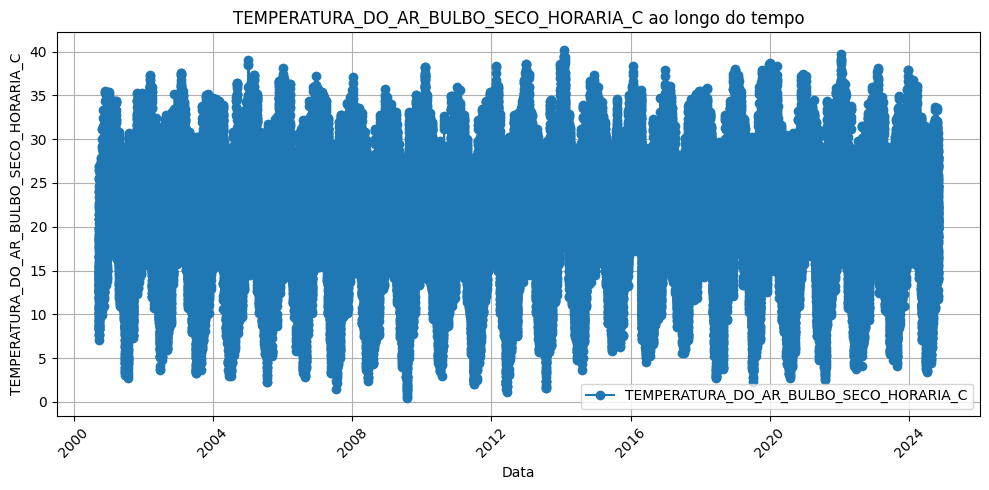

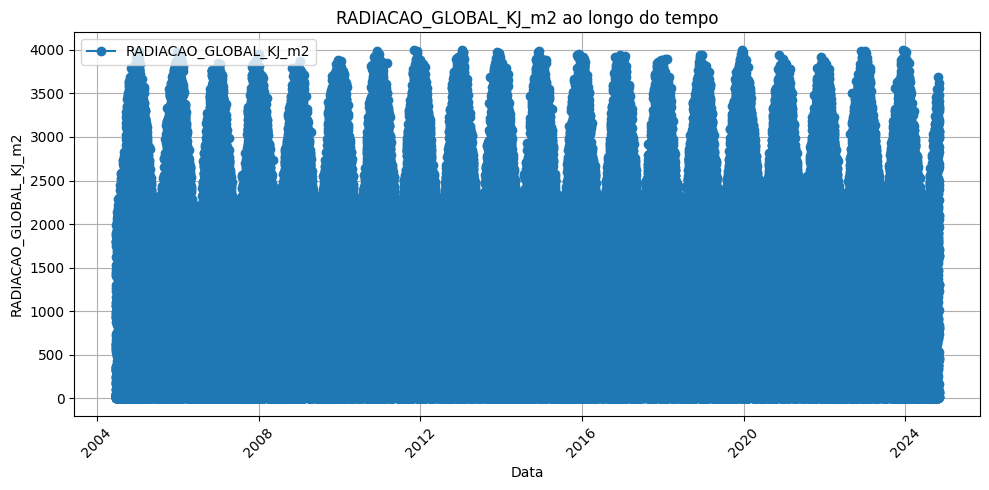

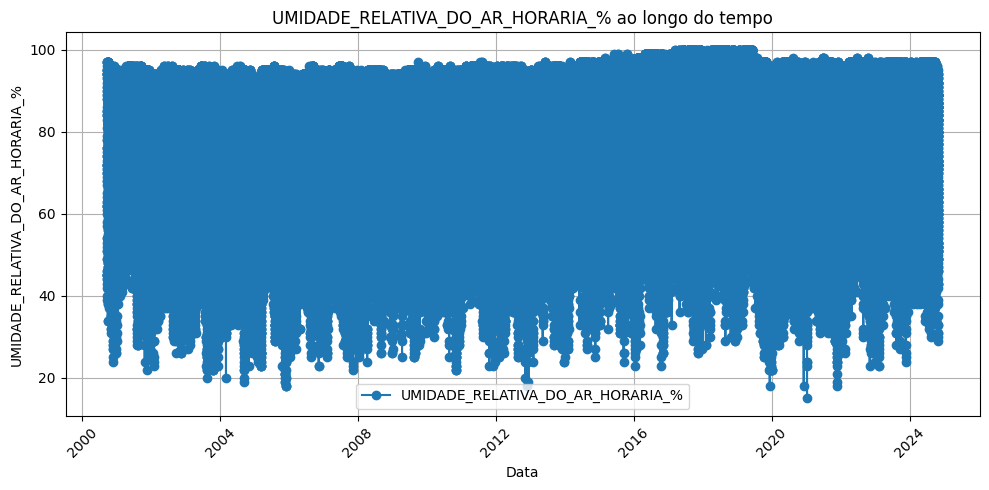

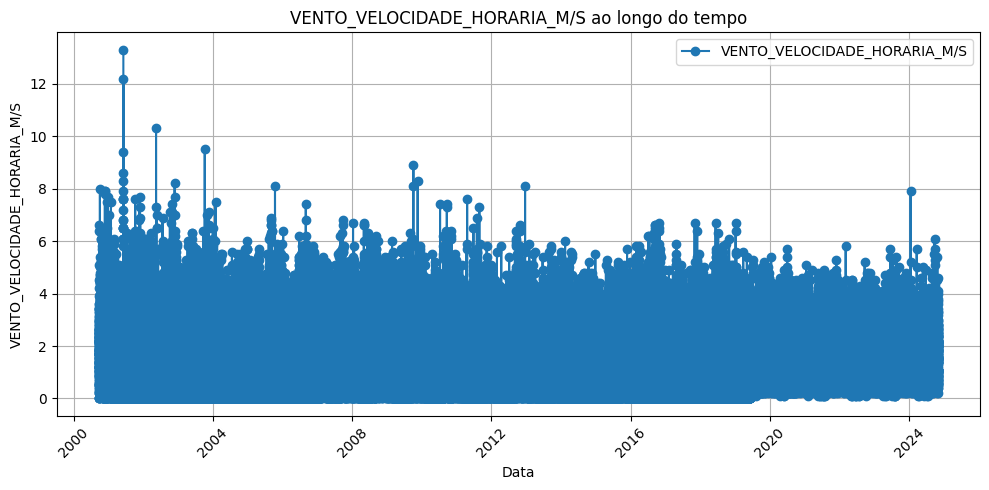

In [88]:
columns = ['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C',
            'RADIACAO_GLOBAL_KJ_m2',
            'UMIDADE_RELATIVA_DO_AR_HORARIA_%',
            'VENTO_VELOCIDADE_HORARIA_M/S']

for variavel in columns:
    plt.figure(figsize=(10, 5))
    plt.plot(dataset['DATA'], dataset[variavel], marker='o', label=variavel)
    plt.title(f'{variavel} ao longo do tempo')
    plt.xlabel('Data')
    plt.ylabel(variavel)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Resolver os dados NAN